Basic imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading dataset

In [5]:
data=pd.read_csv('/content/drive/MyDrive/Dataset/Telco_Customer_Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#shape of the dataset
data.shape

(7043, 21)

Droping the customerID column because it has no significant for predicting churn

In [7]:
data.drop('customerID',axis=1,inplace=True)

In [8]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges is object type, so review the TotalCharges column

In [9]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

We can see that it is string type so lets change it into numeric

In [10]:
pd.to_numeric(data.TotalCharges)

ValueError: Unable to parse string " " at position 488

Some values seems like missing values

In [11]:
pd.to_numeric(data.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
data.shape

(7043, 20)

In [14]:
data.iloc[488]['TotalCharges']

' '

creating a new dataset by remove the rows which has missing value of the TotalCharges

In [15]:
data_new=data[data.TotalCharges!=' ']

We can neglect the 11 rows over 7043 rows

In [16]:
data_new.shape

(7032, 20)

In [17]:
data_new.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
data_new.TotalCharges=pd.to_numeric(data_new.TotalCharges)

<ipython-input-18-850a868d956a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.TotalCharges=pd.to_numeric(data_new.TotalCharges)


In [19]:
data_new.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [21]:
data_new[data_new.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


Visualizing tenure column

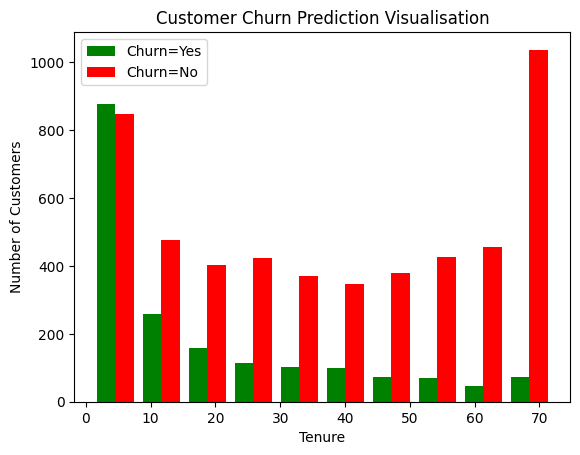

In [22]:
tenure_churn_no=data_new[data_new.Churn=='No'].tenure
tenure_churn_yes=data_new[data_new.Churn=='Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualisation')
plt.hist([tenure_churn_yes,tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

Visualizing MonthlyCharges column

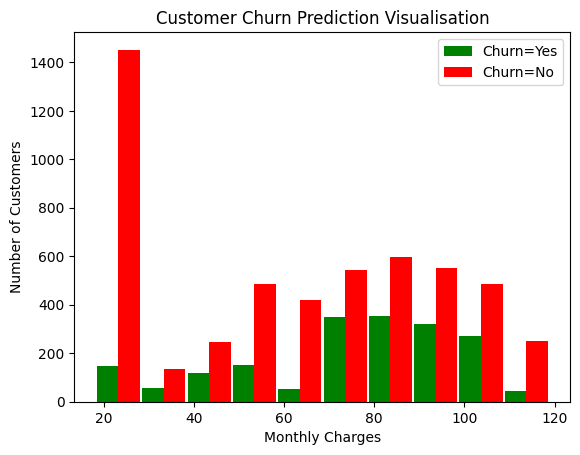

In [23]:
mc_churn_no=data_new[data_new.Churn=='No'].MonthlyCharges
mc_churn_yes=data_new[data_new.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualisation')

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 120]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes,mc_churn_no], rwidth=0.95, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

many of the features are in yes and no values
priting the unique values

In [24]:
def print_unique_col_values(data):
  for column in data_new:
    if data_new[column].dtypes=='object':
      print(f'{column} : {data_new[column].unique()}')

In [25]:
print_unique_col_values(data_new)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


replace the "No internet service" and "No phone service" >> "No"

In [26]:
data_new.replace('No internet service','No',inplace=True)
data_new.replace('No phone service','No',inplace=True)

<ipython-input-26-37f10dcc6274>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.replace('No internet service','No',inplace=True)
<ipython-input-26-37f10dcc6274>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.replace('No phone service','No',inplace=True)


In [27]:
print_unique_col_values(data_new)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


converting yes and no >> 1 and 0

In [28]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
  data_new[col].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-28-8fe06a85a3d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[col].replace({'Yes':1,'No':0},inplace=True)


In [29]:
for col in data_new:
  print(f'{col} : {data_new[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


converting female and male >> 1 and 0

In [30]:
data_new['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-30-50ba94b4b8a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['gender'].replace({'Female':1,'Male':0},inplace=True)


In [31]:
data_new['gender'].unique()

array([1, 0])

one hot encoding for the categorical columns

In [32]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(data_new['InternetService'].values.reshape(-1,1)).toarray()

values = dict(data_new["InternetService"].value_counts())

for e , (val , _) in enumerate(values.items()):
    data_new["InternetService_" + str(val)] = part[:,e]

data_new = data_new.drop(["InternetService"] , axis = 1)

data_new.head()

<ipython-input-32-e3145b6a8c85>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["InternetService_" + str(val)] = part[:,e]
<ipython-input-32-e3145b6a8c85>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["InternetService_" + str(val)] = part[:,e]
<ipython-input-32-e3145b6a8c85>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_DSL,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1.0,0.0,0.0
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1.0,0.0,0.0
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1.0,0.0,0.0
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1.0,0.0,0.0
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0.0,1.0,0.0


In [33]:
part = onehotencoder.fit_transform(data_new['Contract'].values.reshape(-1,1)).toarray()

values = dict(data_new["Contract"].value_counts())

for e , (val , _) in enumerate(values.items()):
    data_new["Contract_" + str(val)] = part[:,e]

data_new = data_new.drop(["Contract"] , axis = 1)

data_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_DSL,InternetService_No,Contract_Month-to-month,Contract_Two year,Contract_One year
0,1,0,1,0,1,0,0,0,1,0,...,Electronic check,29.85,29.85,0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,34,1,0,1,0,1,...,Mailed check,56.95,1889.50,0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,2,1,0,1,1,0,...,Mailed check,53.85,108.15,1,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,45,0,0,1,0,1,...,Bank transfer (automatic),42.30,1840.75,0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,2,1,0,0,0,0,...,Electronic check,70.70,151.65,1,0.0,1.0,0.0,1.0,0.0,0.0


In [34]:
part = onehotencoder.fit_transform(data_new['PaymentMethod'].values.reshape(-1,1)).toarray()

values = dict(data_new["PaymentMethod"].value_counts())

for e , (val , _) in enumerate(values.items()):
    data_new["PaymentMethod_" + str(val)] = part[:,e]

data_new = data_new.drop(["PaymentMethod"] , axis = 1)

data_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_DSL,InternetService_No,Contract_Month-to-month,Contract_Two year,Contract_One year,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,1,0,1,0,1,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,34,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,2,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,45,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
data_new.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_Fiber optic                float64
InternetService_DSL                        float64
InternetService_No             

As we can see that all the dtypes in float and int
Now, we have to scale the tenure, MonthlyCharges and TotalCharges

In [36]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_new[cols_to_scale] = scaler.fit_transform(data_new[cols_to_scale])

In [37]:
data_new.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_DSL,InternetService_No,Contract_Month-to-month,Contract_Two year,Contract_One year,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
4426,1,0,0,1,0.211268,1,1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5427,1,0,0,0,0.422535,1,1,1,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
880,0,0,0,0,0.126761,1,0,1,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1558,1,0,0,0,0.211268,1,1,0,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2512,1,0,1,0,0.309859,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [38]:
for col in data_new:
  print(f'{col} : {data_new[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

Train and test split

In [39]:
X= data_new.drop('Churn',axis='columns')
y=data_new['Churn']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [41]:
X_train.shape

(5625, 26)

In [42]:
X_test.shape

(1407, 26)

In [44]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5193 - accuracy: 0.7360
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4294 - accuracy: 0.7952
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8000
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8027
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8037
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8036
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8084
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8084
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8060
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4052 - accura

In [45]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7790


[0.4720649719238281, 0.7789623141288757]

In [46]:
yp=model.predict(X_test)
yp[:10]

44/44 [==============================] - 0s 1ms/step


array([[0.24795862],
       [0.5827905 ],
       [0.01424351],
       [0.7900314 ],
       [0.36625877],
       [0.93162745],
       [0.01497435],
       [0.44339594],
       [0.3429402 ],
       [0.81669354]], dtype=float32)

In [47]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [48]:
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [49]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 1]

In [50]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       999
           1       0.63      0.59      0.61       408

    accuracy                           0.78      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.78      0.78      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

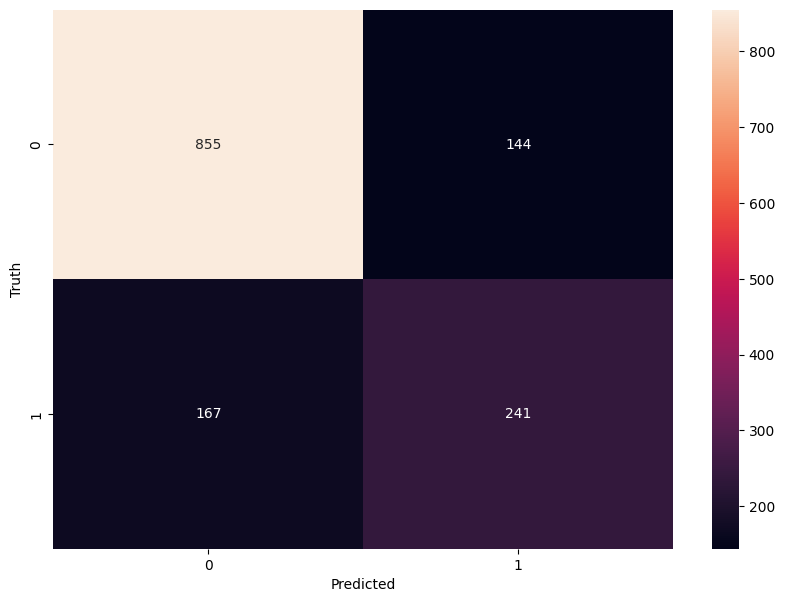

In [51]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy

In [55]:
round((855+241)/(855+144+167+241),2)

0.78

precision for 0 class, precision for customers who did not churn

In [58]:
round(855/(855+167),2)

0.84

precision for 1 class, precision for customers who actually churn

In [60]:
round(241/(241+144),2)

0.63

recall for 0 class

In [61]:
round(855/(855+144),2)

0.86

recall for 1 class

In [62]:
round(241/(241+167),2)

0.59